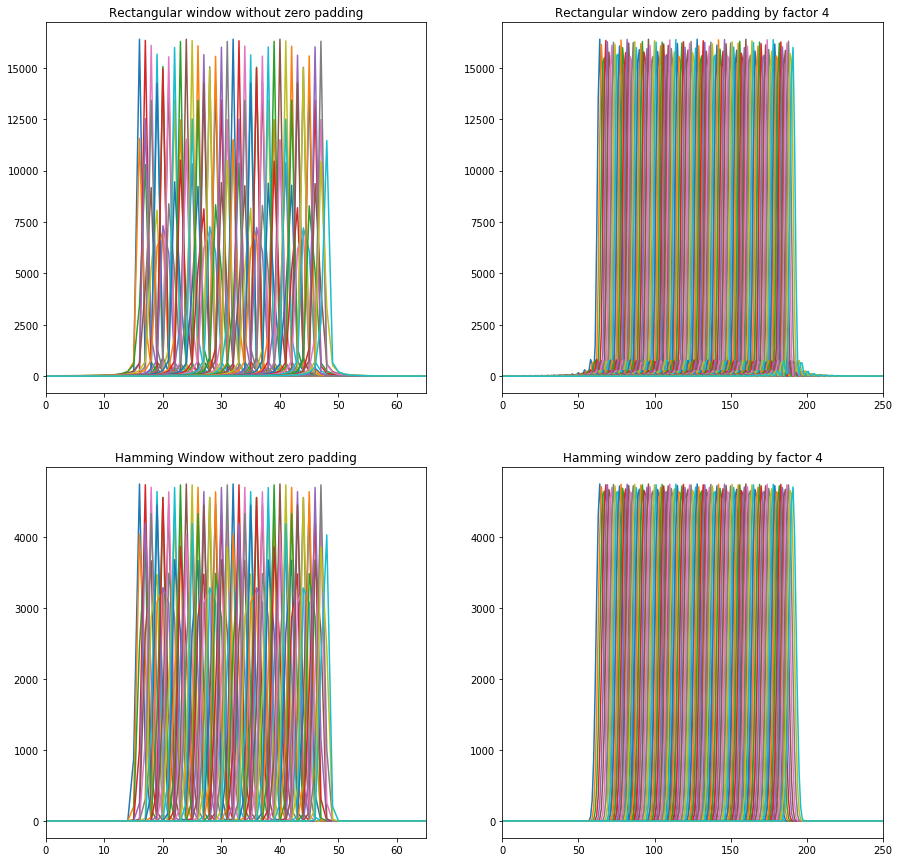

In [7]:
'''
Using the following Python script as an example, 
plot the squared-magnitude frequency response of the 
following test cases over the digital frequencies ωc=[π8,3π8].

Rectangular window with no zero-padding

Hamming window with no zero-padding

Rectangular window with zero-padding by factor of four (i.e., 1024-point FFT)

Hamming window window with zero-padding by factor of four

'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#%matplotlib inline      # Uncomment this to show figure in Jupyter Notebook

N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test
Nz = 1024                # zero padding

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

Sr = np.zeros([N,num_freqs]);                        # matrix to hold FFT results of rec_no_zp
Srz = np.zeros([Nz,num_freqs]);                        # matrix to hold FFT results of rec_zp
Sh = np.zeros([N,num_freqs]);                        # matrix to hold FFT results of hamming_no_zp
Shz = np.zeros([Nz,num_freqs]);                        # matrix to hold FFT results of hamming_zp


for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win_r = signal.boxcar(N);                         # use rectangular window
    win_h = signal.hamming(N)                       # Generate the Hamming window without zero padding
    sr = s*win_r;                                      # multiply input by window
    sh = s*win_h
    
    Sr[:,i] = np.square(np.abs(np.fft.fft(sr)));      # generate magnitude of FFT and store as a column of S
    Sh[:,i] = np.square(np.abs(np.fft.fft(sh)));      # generate magnitude of FFT and store as a column of S
    Srz[:,i] = np.square(np.abs(np.fft.fft(sr, n = Nz)));      # generate magnitude of FFT and store as a column of S
    Shz[:,i] = np.square(np.abs(np.fft.fft(sh, n = Nz)));      # generate magnitude of FFT and store as a column of S

plt.figure(figsize = (15,15))
plt.subplot(221)
plt.xlim(0,65)
plt.title("Rectangular window without zero padding")
plt.plot(Sr);                                        # plot all spectra on same graph

plt.subplot(222)
plt.xlim(0,250)
plt.title("Rectangular window zero padding by factor 4")
plt.plot(Srz);                                        # plot all spectra on same graph

plt.subplot(223)
plt.xlim(0,65)
plt.title("Hamming Window without zero padding")
plt.plot(Sh);                                        # plot all spectra on same graph

plt.subplot(224)
plt.xlim(0,250)
plt.title("Hamming window zero padding by factor 4")
plt.plot(Shz);                                        # plot all spectra on same graph


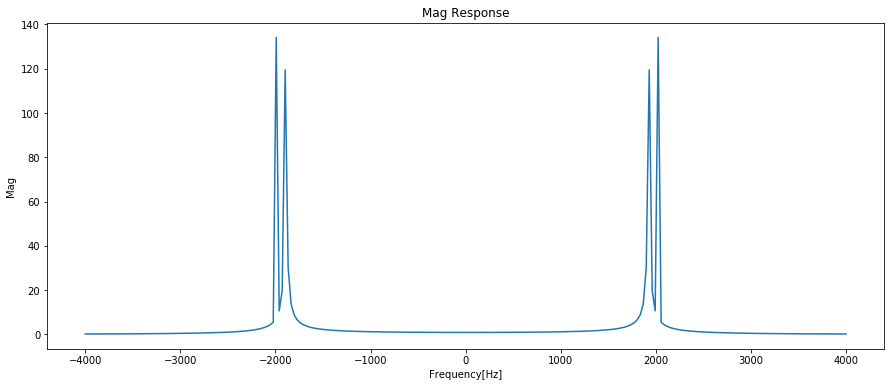

In [32]:
'''
Q:Describe the tradeoff between mainlobe width and sidelobe behavior for the various window functions.
A: When mainlobe is wider, the hight of side lobe will be smaller.

Q:Does zero-padding increase frequency resolution? Are we getting something for free?
A:It increases the freq point, and therefore increases the FFT resolution.

What is the relationship between the DFT, X[k], and the DTFT, X(ω), of a sequence x[n]?
x[n] --DTFT--> X(w) --sampling--> X[k]
'''
import numpy as np
from IPython.display import Audio

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 600       # Tune Frequency is 600Hz
tune = np.sin(2*np.pi*freq*t)

# To listen to it, you can use:
Audio(tune,rate=fs)
'''
Generate a block of 256 samples of x(n) and use the Fast Fourier Transform (fft) 
function to determine the two frequency components. Plot the magnitude of the frequency output.
'''
f1, f2, fs = 1900, 2000, 8000
n = np.arange(256)
x = np.sin(2*np.pi*f1*n/fs) + np.sin(2*np.pi*f2*n/fs)
fth = np.pi*1/(2*np.pi)*fs
X = np.fft.fftshift(np.fft.fft(x))
x_axis = np.linspace(-fth,fth,len(X))

plt.figure(figsize=(15,6))
plt.title('Mag Response')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Mag ')
plt.plot(x_axis,np.absolute(X))

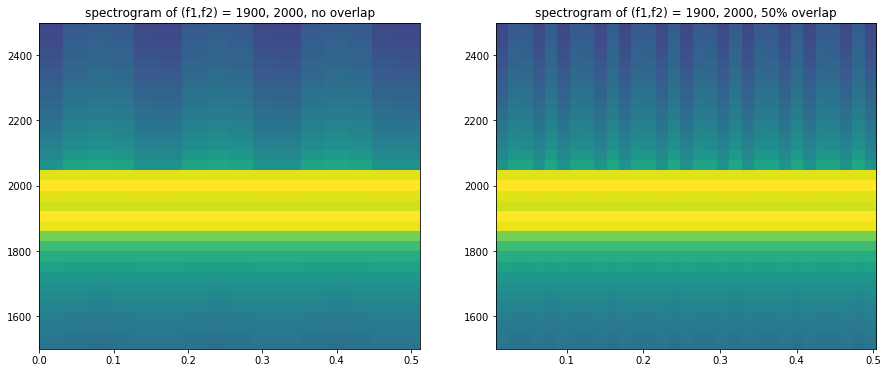

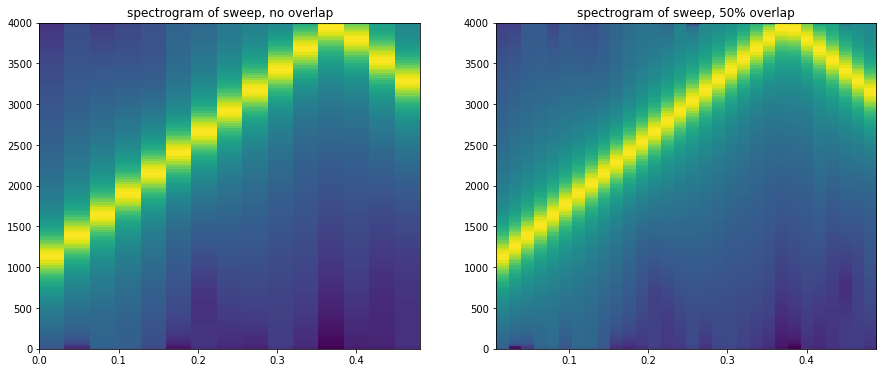

"\nQ: How are the spectrograms different between no overlap and 50% overlap?\nA: The time resolution increases when there is overlap.\n\nQ: What is going on at 0.4 seconds into the frequency-sweep signal?\nA: There might be an aliasing at this point(however I really can't tell from this plot).\n\n"

In [46]:
'''
What is the closest frequency to 2000 Hz that you can resolve using the Fourier transform method? 
Which of the following method applied to x(n) results in the best resolving capabilities? Why?

Rectangular window with no zero-padding
Hamming window with no zero-padding
Rectangular window with zero-padding by factor of four (i.e., 1024-point FFT)
Hamming window window with zero-padding by factor of four

ANS:
It will be 2000 +- 50 Hz
I've tried 1990->1970->1960->1955, non of which appears with 2 peaks
But when there are two peaks when I tried with 1950 


'''

import numpy as np
from IPython.display import Audio
from scipy import signal

t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep that goes from 1000 Hz to 5000 Hz in 0.5 seconds
Audio(s,rate=8192)    # Default rate is 8192Hz

f1, f2, fs = 1900, 2000, 8000
n = np.arange(4096)
x = np.sin(2*np.pi*f1*n/fs) + np.sin(2*np.pi*f2*n/fs)

plt.figure(figsize = (15,6))
plt.subplot(121)
plt.title("spectrogram of (f1,f2) = 1900, 2000, no overlap")
plt.specgram(x, Fs = fs, noverlap = 0)
plt.ylim(1500, 2500)

plt.subplot(122)
plt.title("spectrogram of (f1,f2) = 1900, 2000, 50% overlap")
plt.specgram(x, Fs = fs, noverlap = 128)
plt.ylim(1500, 2500)
plt.show()

plt.figure(figsize = (15,6))
plt.subplot(121)
plt.title("spectrogram of sweep, no overlap")
plt.specgram(s, Fs = fs, noverlap = 0)

plt.subplot(122)
plt.title("spectrogram of sweep, 50% overlap")
plt.specgram(s, Fs = fs, noverlap = 128)
plt.show()

'''
Q: How are the spectrograms different between no overlap and 50% overlap?
A: The time resolution increases when there is overlap.

Q: What is going on at 0.4 seconds into the frequency-sweep signal?
A: There might be an aliasing at this point(however I really can't tell from this plot).

'''